In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

/Users/duqiming2004/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Fluctuation analysis for adapted-levels algorithm
In this section we will do some analysis of the comportment of $\sqrt N\frac{\hat p - p}{p}$. In the idealized situation, by the thm of CTL, it converges to a normal law and we are interested in estimating the variance of this normal distribution.

In [3]:
from numba import autojit
@autojit
def S(X):
    '''score function which is a black box'''
    return np.abs(X)

In [52]:
q_test = 5
from scipy.stats import norm
p = (1-norm.cdf(q_test))*2

p_0 = 0.75 #success rate
n_0 = int(np.log(p)/np.log(p_0))
r = p/(p_0**n_0)
sigma_theoretical = np.sqrt(n_0*(1-p_0)/p_0 + (1-r)/r)
print ("theoretical relative standard variation: ", sigma_theoretical)
print "real value of p:" ,p

('theoretical relative standard variation: ', 4.0804938174736263)
real value of p: 5.73303143847e-07


In [53]:
def mu_0_test(N,q_test):
    '''The distribution of X that we could simulate'''
    ## To ensure that L_k != empty
    X = np.random.normal(0,1,N)
#     while(np.sum((S(X)>q_test)) == 0):
#         X = np.random.normal(0,1,N)
    return X


def L_empirical(X,alpha, N, score_function):  
    return np.sort(score_function(X))[np.int((1-alpha)*N)]



sigma_1 = 0.2
std_tuning = np.sqrt(sigma_1**2)/(1+sigma_1**2)
c = np.sqrt(1+sigma_1**2)
def shaker_test(X):
    return np.random.normal(X/c,std_tuning,1)
    





def simulation_adapted_levels(real_p, p_0, N, mu_0, q_test, score_function, status_track = False,shaker = shaker_test):
    X = mu_0(N,q_test)
    L = np.array([-np.Inf,L_empirical(X ,p_0 ,N,score_function )])
    k = 1

    while(L[k]<q_test):
        if status_track == True:
            print "\t"
            print "k = ",k
            print 'current level: ', L[k]
        I = []
        for i in range(N):
            if S(X[i])>L[k]:
                I = np.append(I, X[i])
        l = len(I)
        X[0:l] = I

    ###### permutation trick to replace multinominal distribution
        I = np.random.permutation(I)
        for i in range(l,N,1):
            X[i] = I[i%l]    
            
    ###### shaker
        for j in range(N):            
            X_iter = shaker(X[j])
            if score_function(X_iter)>L[k]:
                X[j] = X_iter
            
        
        L = np.append(L, L_empirical(X,p_0 ,N,score_function))
        k += 1
    N_L = np.sum((S(X)>q_test))
    p_hat = N_L/float(N)*p_0**(k-1)
    rel_var = (p_hat-real_p)/real_p
#     L_adapted = L[0:-1]
#     L_adapted = np.append(L_adapted, q_test)
    
    if status_track ==True:
        print ("final k = ",k)
        print ("real value of p:" ,p)
        print ("estimation of p: ", p_hat)
        print ("sqrt(N) * relative variation: ",rel_var * np.sqrt(N))
    return p_hat, rel_var


In [55]:
#test
simulation_adapted_levels(real_p = p, p_0 = 0.75, N = 2000, mu_0 = mu_0_test,
                          q_test = 5, score_function = S, status_track = True)

	
k =  1
current level:  0.332177559641
	
k =  2
current level:  0.590757939443
	
k =  3
current level:  0.823605732066
	
k =  4
current level:  1.00733059001
	
k =  5
current level:  1.20480629358
	
k =  6
current level:  1.37414487454
	
k =  7
current level:  1.52072614293
	
k =  8
current level:  1.66115067009
	
k =  9
current level:  1.80591238583
	
k =  10
current level:  1.93053610426
	
k =  11
current level:  2.03517610256
	
k =  12
current level:  2.16381203735
	
k =  13
current level:  2.27661799539
	
k =  14
current level:  2.38539780867
	
k =  15
current level:  2.49000692321
	
k =  16
current level:  2.58970915905
	
k =  17
current level:  2.68944898402
	
k =  18
current level:  2.78246510955
	
k =  19
current level:  2.87010176894
	
k =  20
current level:  2.9590510663
	
k =  21
current level:  3.04599023494
	
k =  22
current level:  3.12938553633
	
k =  23
current level:  3.20368239522
	
k =  24
current level:  3.27888594145
	
k =  25
current level:  3.35070196364
	
k =  

(4.1709589995843953e-07, -0.27246884229593443)

In [18]:
# list_N = [100,500,1000,3000]
# n_choice_N = len(list_N)
# n_sim = 100

# sim_N =[[ [] for j in range(n_sim)] for i in range(n_choice_N)]
# print ("Total number of simulation: ", n_choice_N)
# for index_sim in range(n_choice_N):
#     for i in range(n_sim):
#         sim_N[index_sim][i] = simulation_adapted_levels(real_p = p ,p_0 = 0.75, N = list_N[index_sim],
#                                   mu_0 = mu_0_test, q_test = 5, score_function = S, status_track = False)
        
#     print ("simulation completed: ",index_sim+1)
# sim_N = np.array(sim_N)

('Total number of simulation: ', 4)
('simulation completed: ', 1)
('simulation completed: ', 2)
('simulation completed: ', 3)
('simulation completed: ', 4)


In [19]:
estimation_sim = np.array([sim_N[i][:,0] for i in range(n_choice_N)])
sigma_relative_variation_sim = np.array([sim_N[i][:,1] * np.sqrt(list_N[i]) for i in range(n_choice_N)]) 
print ("theoretical std of relative variation: ", sigma_theoretical)
std_sqrtN = np.array([np.std(sigma_relative_variation_sim[i]) for i in range(n_choice_N)])
print ("\sqrt N * std of relative variation : ", std_sqrtN )

('theoretical std of relative variation: ', 4.0804938174736263)
('\\sqrt N * std of relative variation : ', array([ 12248.79975154,   1088.73813408,    265.47711428,    101.37286554]))


## Fluctuation Analysis

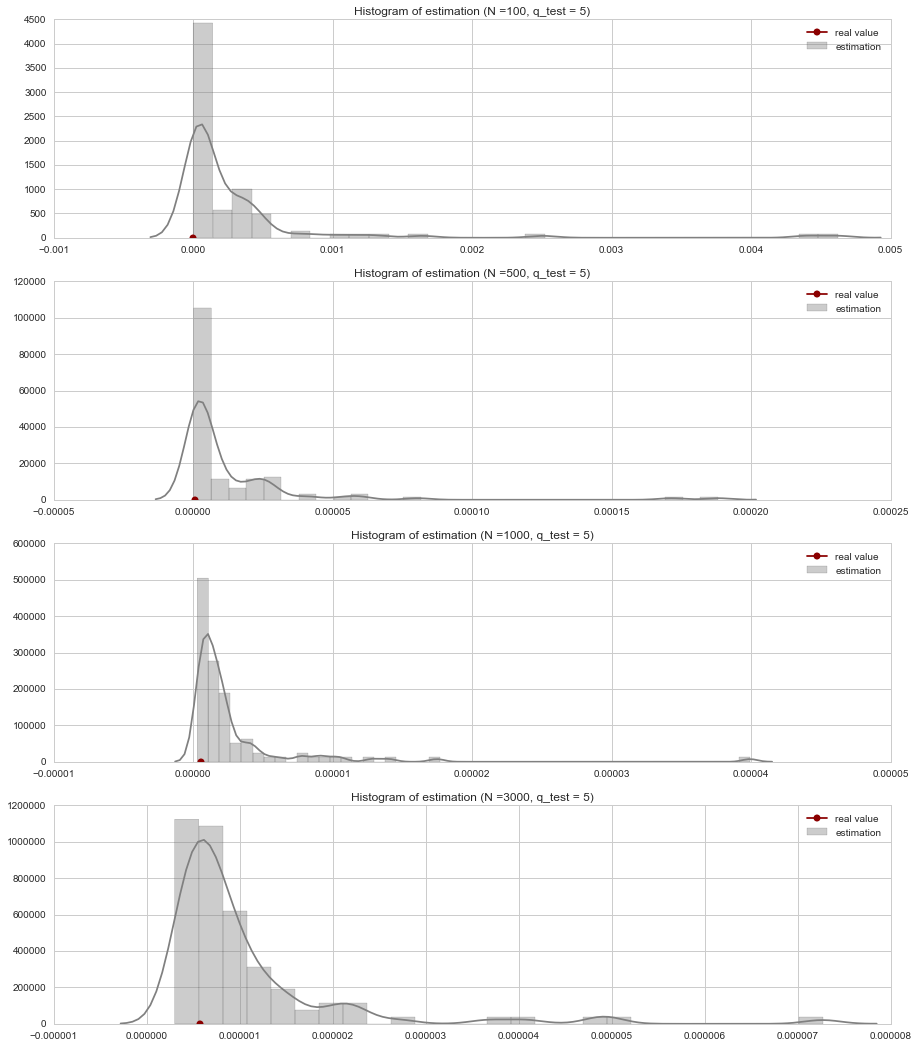

In [29]:
##fluctuation
plt.figure(figsize = [15,18])
for i in range(n_choice_N):
    plt.subplot(n_choice_N,1,i+1)

    sns.distplot(estimation_sim[i] , label = "estimation",color = "grey")
    plt.title('Histogram of estimation (N ='+str(list_N[i])+', q_test = 5)')
    x = np.arange(-1,1,0.1)
    plt.plot(p,0,marker = "o",color = 'darkred',label = "real value")
    plt.legend()
    #plt.xlim([-0.3,0.3])




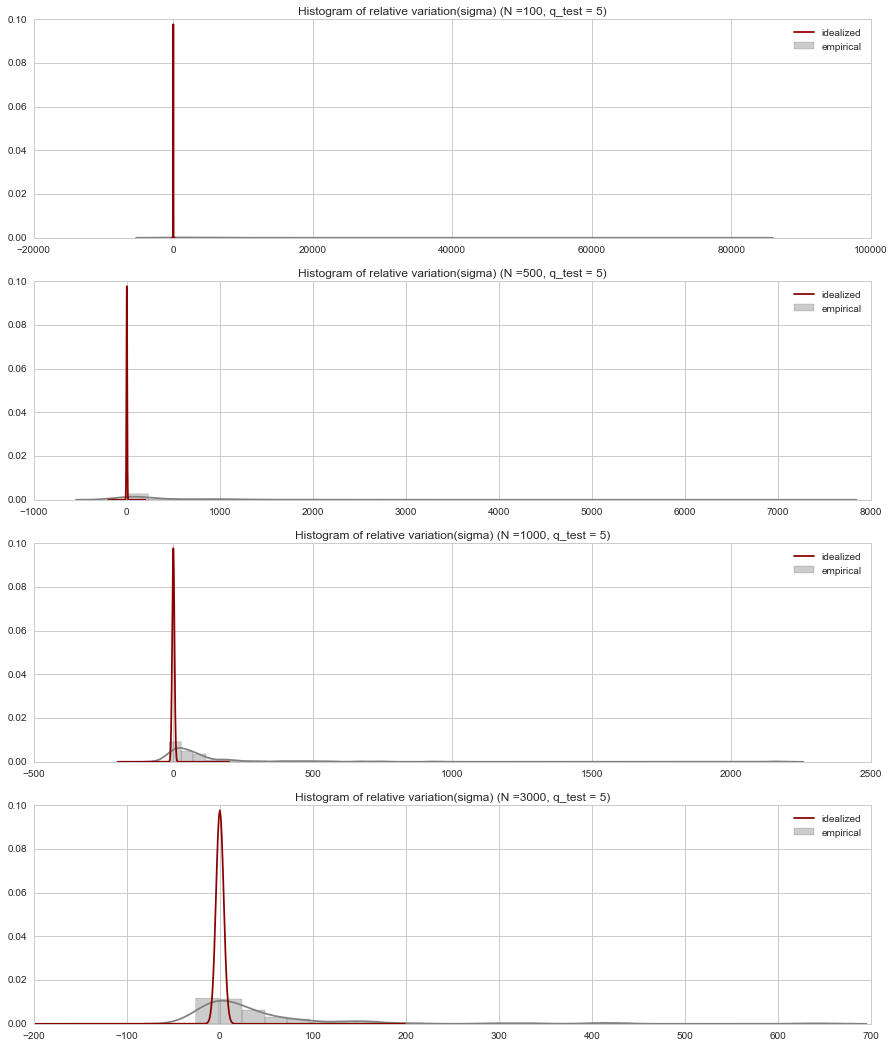

In [42]:
##fluctuation of variance(sigma)
plt.figure(figsize = [15,18])
for i in range(n_choice_N):
    plt.subplot(n_choice_N,1,i+1)

    sns.distplot(sigma_relative_variation_sim[i] , label = "empirical", color = "grey")
    plt.title('Histogram of relative variation(sigma) (N ='+str(list_N[i])+', q_test = 5)')
    x = np.arange(-200,200,1)
    plt.plot(x,norm.pdf(x,np.float(1/list_N[i])*(1-p_0)/p_0,sigma_theoretical), label = "idealized", color = "darkred")
    plt.legend()
    #plt.xlim([-5000,5000])




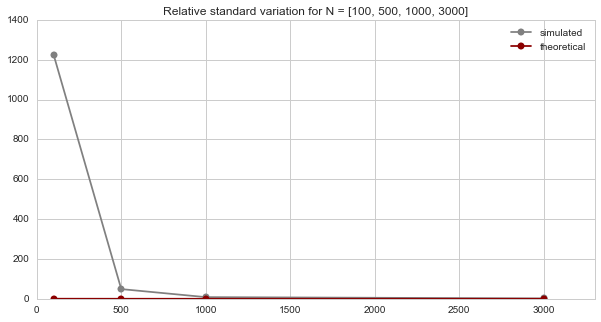

In [35]:
plt.figure(figsize = [10,5])
plt.plot(list_N, std_sqrtN/ np.sqrt(list_N), label = "simulated", marker = 'o',color ="grey")
plt.plot(list_N,  sigma_theoretical /np.sqrt(list_N), label = "theoretical", marker = 'o' ,color ="darkred"   ) 
plt.legend()
plt.xlim([0,3300])
plt.title("Relative standard variation for N = "+str(list_N))

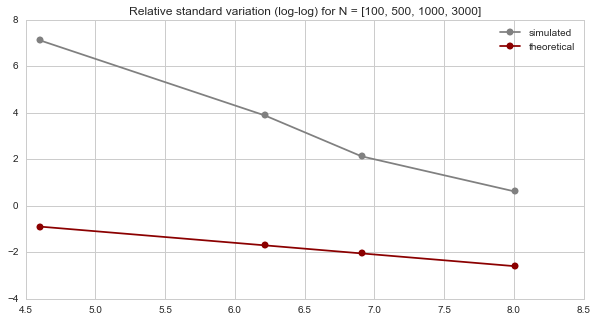

In [36]:
plt.figure(figsize = [10,5])
plt.plot(np.log(list_N), np.log(std_sqrtN/ np.sqrt(list_N)), label = "simulated", marker = 'o',color = "grey")
plt.plot(np.log(list_N),  np.log(sigma_theoretical /np.sqrt(list_N)), label = "theoretical", marker = 'o' ,color = "darkred" ) 
plt.legend()
plt.title("Relative standard variation (log-log) for N = "+str(list_N))

In [24]:
np.mean(estimation_sim[3])

1.0654013065505207e-06